<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Updated_Hypergraph_Models_071323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [2]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [3]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


In [4]:
!pip install hypernetx
import hypernetx as hnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you h

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


Degree Sequence:  [3, 4, 6, 3, 3, 3, 7, 4, 3, 3, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [16, 26, 40, 37, 19, 21, 33, 32]
Hypergraph Dictionary:  {6: [34, 7, 36, 23, 21, 31, 1, 29, 5, 41, 21, 49, 49, 37, 15, 15, 14, 2, 29, 24, 32, 18, 47], 3: [13, 22, 32, 25, 5, 18, 4, 26, 27, 1, 30, 38, 25, 8, 43, 20, 44, 39, 37, 43, 12, 12, 6, 30, 42, 10], 2: [27, 44, 42, 9, 2, 11, 48, 35, 38, 14, 48, 20, 48, 46, 31, 2, 6, 17, 34, 6, 35, 10, 40, 13, 39, 36, 7, 9, 16], 1: [9, 0, 27, 28, 2, 7, 16, 22, 46, 41, 41, 45, 22, 39, 49, 29, 23, 19, 33], 4: [3, 13, 2, 34, 0, 6, 25, 26, 23, 45, 12, 6, 30, 24], 7: [47, 21, 7, 17, 46, 31, 36, 4, 45, 33, 12, 4, 16, 1, 3, 10, 14, 47, 32, 2, 17, 43, 28, 19, 15, 24, 11, 42], 5: [19, 11, 6, 38, 18, 20, 0, 1, 3, 33, 40, 28, 26], 0: [35, 6, 40, 11, 37, 8, 44, 11, 5, 8]}


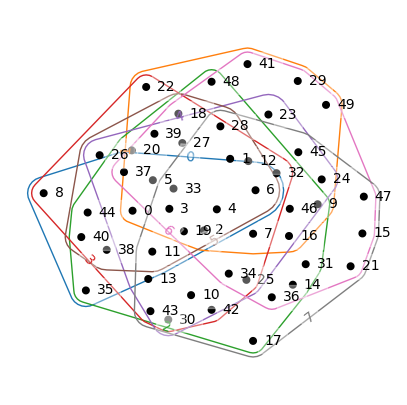

In [5]:
# Test 1
n =50  # Number of nodes
gamma = 2.5  # Power-law exponent
kmin = 3  # Minimum degree
num_hyper_edges = 8  # Desired number of hyper edges

degrees, hyperedge_dict = build_hypergraph(n, gamma, kmin, num_hyper_edges)
# Plot the hypergraph
H = hnx.Hypergraph(hyperedge_dict)
plt.subplots(figsize=(5,5))
hnx.draw(H)

In [7]:
# Test 2
n2 =400  # Number of nodes
gamma2 = 2.5  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 100  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

Degree Sequence:  [8, 10, 3, 5, 3, 5, 3, 3, 3, 6, 4, 5, 3, 3, 3, 3, 3, 3, 5, 4, 3, 4, 3, 8, 3, 10, 3, 5, 3, 3, 3, 3, 4, 3, 6, 3, 4, 3, 6, 3, 3, 4, 3, 5, 5, 3, 9, 3, 8, 3, 3, 3, 3, 4, 3, 5, 4, 4, 3, 3, 11, 8, 4, 3, 6, 5, 19, 3, 4, 3, 9, 4, 3, 5, 3, 3, 4, 3, 3, 3, 7, 10, 3, 3, 4, 5, 3, 7, 4, 4, 3, 5, 5, 3, 3, 3, 5, 5, 4, 3, 3, 8, 4, 4, 4, 4, 3, 5, 13, 4, 5, 9, 3, 10, 3, 4, 3, 7, 7, 6, 8, 3, 4, 3, 4, 3, 3, 5, 3, 4, 3, 3, 4, 4, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [6]:
# Test 3
n3 =400  # Number of nodes
gamma3 = 2.5  # Power-law exponent
kmin3 = 3  # Minimum degree
num_hyper_edges3 = 100  # Desired number of hyper edges

degrees3, hyperedge_dict3 = build_hypergraph(n3, gamma3, kmin3, num_hyper_edges3)
H3 = hnx.Hypergraph(hyperedge_dict3)

Degree Sequence:  [3, 3, 4, 7, 3, 3, 3, 3, 4, 4, 3, 3, 3, 10, 3, 3, 3, 3, 4, 3, 3, 3, 3, 10, 6, 14, 5, 5, 4, 3, 3, 3, 3, 4, 3, 7, 7, 4, 3, 3, 3, 3, 6, 3, 3, 7, 8, 3, 13, 12, 3, 4, 3, 8, 13, 5, 3, 8, 3, 3, 3, 3, 3, 3, 4, 5, 3, 9, 3, 6, 3, 5, 6, 4, 4, 4, 3, 5, 7, 17, 4, 7, 6, 3, 10, 3, 7, 5, 3, 6, 4, 3, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 5, 3, 3, 3, 7, 11, 12, 3, 3, 5, 4, 3, 8, 3, 4, 3, 3, 3, 3, 11, 5, 5, 3, 4, 3, 3, 4, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

## Part 2: Assign Threshold
The following steps assigns a threshold value to each node in the network. The threshold follows a uniform or normal distribution with predefined mean (mu) and standard deviation (sigma).

In [8]:
import numpy as np
import random

# Defines the parameters to be used
mu = 0.1
sigma = 0.05

# Function to assign thresholds to the individual nodes
def assign_thresholds(hypergraph):
    NV = hypergraph.order()
    Ltre = {}

    for node in hypergraph.nodes():
          # Uniform distribution: #
          #Ltre[node] = np.random.uniform()
          # Normal distrution
          while True:
              threshold = random.gauss(mu, sigma)
              if 0 < threshold < 1:
                  break
          Ltre[node] = threshold

    return Ltre

Ltre = assign_thresholds(H)

print("Threshold List for Nodes: ", Ltre )

Threshold List for Nodes:  {0: 0.1395882406837738, 1: 0.13120694124126306, 2: 0.07900110635569993, 3: 0.12454886544391863, 4: 0.11198175785870208, 5: 0.1105650800250279, 6: 0.14177679096874246, 7: 0.11761762182663447, 8: 0.05865311010071486, 9: 0.18142642507056114, 10: 0.1297107510184845, 11: 0.09858596428447905, 12: 0.09646221529278817, 13: 0.08186656424611359, 14: 0.13392810287978518, 15: 0.12707339337056556, 16: 0.09012633077620959, 17: 0.17776493470095386, 18: 0.045151292979072825, 19: 0.08542646689873708, 20: 0.1742710030767507, 21: 0.13390174824820367, 22: 0.1158905784104188, 23: 0.020308890894186138, 24: 0.09837090280807234, 25: 0.05087086869664967, 26: 0.06856493673583916, 27: 0.05185157345262392, 28: 0.10436299876616746, 29: 0.1094656185053785, 30: 0.0645672266142438, 31: 0.1532283666301914, 32: 0.061465690607980725, 33: 0.14004599395045225, 34: 0.14238173600274667, 35: 0.021925282465500726, 36: 0.1504386386844043, 37: 0.13486107809558617, 38: 0.10059545676375381, 39: 0.151442

In [9]:
Ltre2 = assign_thresholds(H2)

print("Threshold List for Nodes: ", Ltre2 )

Threshold List for Nodes:  {0: 0.058431214378331105, 1: 0.09511720575712516, 2: 0.14741873361269453, 3: 0.13953516599594729, 4: 0.09954046738195854, 5: 0.09296340625446387, 6: 0.1430156367128021, 7: 0.01633646827656081, 8: 0.1329349829555736, 9: 0.10560821742216056, 10: 0.08971552601978205, 11: 0.1019191337484009, 12: 0.07295135656917444, 13: 0.030004520014739175, 14: 0.04797999707477668, 15: 0.1078023286618936, 16: 0.07114788714307545, 17: 0.0895310462073188, 18: 0.14108062729990845, 19: 0.07596935428791576, 20: 0.1404245385474285, 21: 0.11671912302891485, 22: 0.13020323746885495, 23: 0.15315599959416143, 24: 0.06501451789925203, 25: 0.0688784152666171, 26: 0.13122046765795248, 27: 0.09589319825842577, 28: 0.00900863167396497, 29: 0.07372849012101101, 30: 0.02325712540970422, 31: 0.1447007806930273, 32: 0.14225023252426258, 33: 0.172448902675139, 34: 0.04347780541069432, 35: 0.18767130654716274, 36: 0.15347253201202268, 37: 0.050312233833827935, 38: 0.01775074837112703, 39: 0.18181251

## Part 3: Rumor Spreading on Hypergraph
The follow steps extends the basic rumor spreading model to a hypergraph. An infection or recovery event can only happen if its infected or recovered neighbors reach a pre-assigned threshold.  

In [30]:
def rumor_hyperedge_2(nw, ldeg, mu, lam, alp, n_samp):
    t_max = 10000
    N = nw.order()
    kmax = max(ldeg)
    sigma = 0.05
    ltre = assign_thresholds(nw)

    t_end = 0
    stifler_fractions = []

    for i_samp in range(1, n_samp+1):
        t = 0
        N_rec = 0

        states = {j: 0 for j in nw.nodes()}

        inf = []
        rec = []
        initial_node = np.random.choice(list(nw.nodes()))
        states[initial_node] = 1
        inf.append(initial_node)
        N_inf = 1
        N_e = nw.degree(initial_node)

        while N_inf != 0:
            total_rate = lam * N_e + 2 * alp * N_e
            tau = -np.log(np.random.uniform(1e-6, 1)) / total_rate
            t += tau

            if t >= t_max:
                break

            #print("Current time:", t)
            #print("Infected nodes:", inf)
            #print("Recovered nodes:", rec)
            #print("N_inf:", N_inf)
            #print("N_e:", N_e)
            #plt.figure()
            #plot_hypergraph(H, states)

            # Determine which event occurs
            event = np.random.uniform()
            p1 = lam / (lam + 2 * alp)
            p2 = (lam + alp )/ (lam + 2 * alp)

            # Determine if accept selected spreader based on degree distribution
            q_deg = np.random.uniform()


            # Infection:
            if event <= p1:
                # Select a spreader individual to spread the rumor
                inf_node = random.choice(inf)
                if q_deg < ldeg[inf_node] / kmax:
                    # Select a random hyper edge containing the infected node
                    infected_hyper_edge = np.random.choice(list(nw.edges()))
                    neighbors = nw[infected_hyper_edge]
                    while inf_node not in neighbors:
                        infected_hyper_edge = np.random.choice(list(nw.edges()))
                        neighbors = nw[infected_hyper_edge]

                    # Check if any neighbor meets the infection threshold
                    for neighbor in neighbors:
                        # Check if the selected neighbor is ignorant
                            if states[neighbor] == 0:
                                #print("Infection event")
                            # Check the threshold
                                count_inf_neighbors = sum(states[node] == 1 for node in nw.neighbors(neighbor))
                                if count_inf_neighbors / len(nw.neighbors(neighbor)) >= ltre[neighbor]:
                                    states[neighbor] = 1  # ignorant neighbor becomes spreader
                                    inf.append(neighbor)
                                    N_inf += 1
                                    #print("successful infection")


            else:  # Recovery
                # Select a spreader individual to recover
                rec_node = np.random.choice(inf)
                if q_deg < ldeg[rec_node] / kmax:
                    # Select a random hyperedge containing the recovered node
                    recovered_hyper_edge = np.random.choice(list(nw.edges()))
                    # Get neighbors list
                    neighbors = nw[recovered_hyper_edge]
                    #print("Recovery event", neighbors)
                    if event <=p2:
                        count_rec_neighbors = sum(states[node] == 2 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    else:
                        count_rec_neighbors = sum(states[node] == 1 for node in neighbors)
                        #print("count_rec_neighbors", count_rec_neighbors)
                        if count_rec_neighbors / len(neighbors) >= ltre[rec_node]:
                        #if count_rec_neighbors > 0:
                            # Update spreader to stifler if the selected neighbor is a stifler or spreader
                            states[rec_node] = 2
                            N_inf -= 1
                            inf.remove(rec_node)
                            rec.append(rec_node)
                            N_rec += 1
                            #print("successful recovery")

                    """
                    else:
                        for neighbor in neighbors:
                        # Check the threshold of infected
                            count_inf_neighbors = 0
                            for node in neighbors:
                                if states[node] == 1:
                                    count_inf_neighbors += 1
                            if count_inf_neighbors / len(neighbors) >= Ltre[rec_node]:
                                # Update spreader to stifler if the selected neighbor is a stifler
                                states[rec_node] = 2
                                N_inf -= 1
                                N_e -= nw.degree(rec_node)
                                inf.remove(rec_node)
                                rec.append(rec_node)
                                N_rec += 1
                    """
            #print("N_inf after event:", N_inf)
            #print("N_e after event:", N_e)


        if N_inf == 0:
              t_end += t
              stifler_frac = N_rec / N
              stifler_fractions.append(stifler_frac)
              print("Sampling result - Lam:", lam, "N_rec:", N_rec, "t_end:", t_end, "stifler_frac:", stifler_frac)

    avg_stifler_frac = sum(stifler_fractions) / len(stifler_fractions)
    t_end_av = t_end/n_samp

    #return nw, states
    return avg_stifler_frac, t_end_av

The following function generates the hypergraph based on nodes' disease status, where susceptible nodes are yellow, infected nodes are purple, and recovered nodes are green.

In [11]:
def plot_hypergraph(hypergraph, states):
    pos = nx.spring_layout(hypergraph)
    node_colors = []
    #node_sizes = []
    for node in hypergraph.nodes():
        if states[node] == 1:  # Infected node (purple)
            node_colors.append("purple")
        elif states[node] == 2:  # Recovered node (green)
            node_colors.append("green")
        else:  # Susceptible node (yellow)
            node_colors.append("yellow")
        #node_sizes.append(thresholds[node] * 100)  # Adjust node size based on threshold value

    hnx.drawing.draw(hypergraph, pos, nodes_kwargs={'facecolors': node_colors})

Sampling result - Lam: 0.1 N_rec: 399 t_end: 366.856353914761 stifler_frac: 0.9975
Sampling result - Lam: 0.1 N_rec: 395 t_end: 435.37592434375364 stifler_frac: 0.9875
Sampling result - Lam: 0.1 N_rec: 371 t_end: 865.0839847570442 stifler_frac: 0.9275
Sampling result - Lam: 0.1 N_rec: 1 t_end: 866.8630574609454 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 393 t_end: 1172.799415472945 stifler_frac: 0.9825
Sampling result - Lam: 0.1 N_rec: 391 t_end: 1549.407560992718 stifler_frac: 0.9775
Sampling result - Lam: 0.1 N_rec: 1 t_end: 1553.9056195533478 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 397 t_end: 1719.0790819118347 stifler_frac: 0.9925
Sampling result - Lam: 0.1 N_rec: 1 t_end: 1719.2775591257466 stifler_frac: 0.0025
Sampling result - Lam: 0.1 N_rec: 398 t_end: 2083.723265230976 stifler_frac: 0.995
Sampling result - Lam: 0.1 N_rec: 379 t_end: 2449.63479464408 stifler_frac: 0.9475
Sampling result - Lam: 0.1 N_rec: 397 t_end: 2887.2019471137933 stifler_frac: 0.9

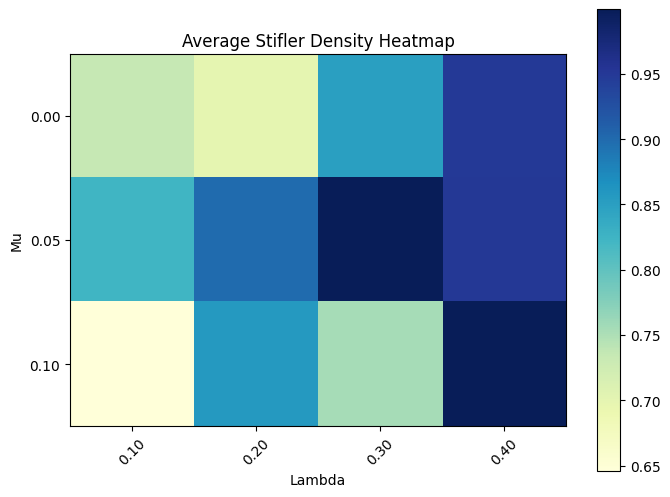

In [31]:
n_samp = 20
alp = 1

# Set the mu and lambda_values
mu_values = np.arange(0.0, 0.15, 0.05)
lambda_values = np.arange(0.1, 0.5, 0.1)

# Initialize the result array
results = np.zeros((len(mu_values), len(lambda_values)))

# Iterate over mu and lambda values
for i, mu in enumerate(mu_values):
    for j, lam in enumerate(lambda_values):
        rho_R_av, t_end_av = rumor_hyperedge_2(H3, degrees3, mu, lam, alp, n_samp)
        results[i, j] = rho_R_av

import matplotlib.ticker as ticker

# Plot the heat map
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(results, cmap='YlGnBu', interpolation='nearest')

# Set the tick labels and show colorbar
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(mu_values)))

# Format the tick labels with two decimal places using string formatting
lambda_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
mu_formatter = ticker.StrMethodFormatter('{:.2f}'.format)
ax.xaxis.set_major_formatter(lambda_formatter)
ax.yaxis.set_major_formatter(mu_formatter)
#ax.invert_yaxis()

ax.set_xticklabels(['{:.2f}'.format(val) for val in lambda_values])
ax.set_yticklabels(['{:.2f}'.format(val) for val in mu_values])
plt.xticks(rotation=45)
plt.colorbar(heatmap)

# Set labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Mu')
ax.set_title('Average Stifler Density Heatmap')

# Display the heat map
plt.show()